Importar Bibliotecas - blibliotecas para analiese de dados

In [3]:
# manipulação de dados
import pandas as pd

In [4]:
# operações numericas e vetoriais
import numpy as np

In [38]:
# visualizações basicas e avançadas
import matplotlib.pyplot as plt

In [39]:
# graficos estatisticos com estilo
import seaborn as sns

In [6]:
# codigo para importar todo drive para o colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# codigo para importar os arquivos, sem precisar do drive
from google.colab import files
uploaded = files.upload()


Saving dados_vendas_empresa_1_Analises.xlsx to dados_vendas_empresa_1_Analises.xlsx


In [86]:
#LENDO O DATA FRAME (LENDO OS DADOS IMPORTADOS NA ABA ANTERIROR)
df = pd.read_excel('dados_vendas_empresa_1_Analises.xlsx')

In [87]:
# ver as primeiras linhas do dataframe
print(df.head())

  Data da Venda  ID do Cliente           Nome do Cliente Estado    Categoria  \
0    2025-02-14           5627           Brenda Monteiro     RS  Eletrônicos   
1    2025-04-19           1368             Nathan Mendes     PR    Alimentos   
2    2025-05-11           3170       Dra. Mariana da Paz     BA    Alimentos   
3    2025-01-13           7689           Pedro das Neves     PR   Brinquedos   
4    2025-01-23           1722  Dr. João Miguel Oliveira     SP   Brinquedos   

             Produto  Quantidade  Preço Unitário  Total da Venda  \
0             Tablet           3          390.42         1171.26   
1               Café           2         1793.52         3587.04   
2              Leite           9         1610.73        14496.57   
3  Jogo de Tabuleiro           8         2391.07        19128.56   
4               Bola           8          235.34         1882.72   

  Status_Cliente  Ano   Mês  Dia  Dia da semana Ano_mês     lucro     Gasto  
0        Não VIP  2025    2   14

Conhecendo nossos dados

In [89]:
# vendo quantas linhas e colunas possúi no dataset
print(f"meu dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas")

meu dataset tem 200 linhas e 17 colunas


In [90]:
# vendo o nome das colunas
print(df.columns.tolist())

['Data da Venda', 'ID do Cliente', 'Nome do Cliente', 'Estado', 'Categoria', 'Produto', 'Quantidade', 'Preço Unitário', 'Total da Venda', 'Status_Cliente', 'Ano ', 'Mês', 'Dia', 'Dia da semana', 'Ano_mês', 'lucro', 'Gasto']


In [91]:
#verificando se os dados estão corretos
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

Data da Venda      0
ID do Cliente      0
Nome do Cliente    0
Estado             0
Categoria          0
Produto            0
Quantidade         0
Preço Unitário     0
Total da Venda     0
Status_Cliente     0
Ano                0
Mês                0
Dia                0
Dia da semana      0
Ano_mês            0
lucro              0
Gasto              0
dtype: int64


In [92]:
#resumo estatistico simples
print(df.describe())

             Data da Venda  ID do Cliente  Quantidade  Preço Unitário  \
count                  200     200.000000  200.000000      200.000000   
mean   2025-03-06 20:02:24    5431.245000    5.805000     1447.800200   
min    2024-12-12 00:00:00    1070.000000    1.000000       22.360000   
25%    2025-01-19 18:00:00    3184.250000    3.000000      715.275000   
50%    2025-03-02 12:00:00    5440.000000    6.000000     1490.750000   
75%    2025-04-18 06:00:00    7691.250000    8.000000     2195.755000   
max    2025-06-10 00:00:00    9988.000000   10.000000     2985.620000   
std                    NaN    2584.896521    2.927426      841.430293   

       Total da Venda         Ano          Mês         Dia  Dia da semana  \
count       200.00000   200.000000  200.000000  200.000000      200.00000   
mean       8412.64690  2024.850000    4.450000   16.405000        4.05000   
min          81.18000  2024.000000    1.000000    1.000000        1.00000   
25%        2630.60000  2025.000000

In [93]:
#VERIFICANDO VALORES ZERADOS NAS COLUNAS NUMERICAS - para chamar colunas especificas usar o "[]" - traduzindo '.eq(0).sum()' = queremos que a soma seja igual a zero
df[['Quantidade','Preço Unitário','Total da Venda']].eq(0).sum()

,0
Quantidade,0
Preço Unitário,0
Total da Venda,0


Operações basicas com o python


In [94]:
#somar coluna
print(df['Total da Venda'].sum())

1682529.38


In [95]:
#multiplicação de colunas
df['Total da Venda'] = df['Quantidade'] * df['Preço Unitário']
print(df['Total da Venda'])

0       1171.26
1       3587.04
2      14496.57
3      19128.56
4       1882.72
         ...   
195     1718.77
196     2895.27
197     1166.30
198     3926.32
199     9041.80
Name: Total da Venda, Length: 200, dtype: float64


In [96]:
#media coluna
print(df['Quantidade'].mean())

5.805


Filtros


In [97]:
#filtar itens de categoria eletronicos
print(df[df['Categoria'] == 'Eletrônicos'])

    Data da Venda  ID do Cliente           Nome do Cliente Estado  \
0      2025-02-14           5627           Brenda Monteiro     RS   
5      2025-04-07           1825          Sr. Breno Farias     SP   
6      2025-06-08           5689           Emanuel Costela     RJ   
9      2025-02-02           7359           Alícia da Cunha     RJ   
15     2025-02-09           2982      Maria Clara Caldeira     BA   
18     2025-02-22           6303      Maria Fernanda Jesus     RJ   
19     2025-04-04           6700             Alana Peixoto     BA   
20     2025-04-04           4907      Dra. Catarina Castro     PE   
24     2025-02-04           7698          Eduarda Teixeira     RS   
50     2024-12-21           9585                Davi Silva     BA   
56     2025-03-07           3003               Clara Viana     PE   
58     2025-02-24           7331           Mirella da Cruz     RS   
63     2024-12-13           8413       João Vitor da Costa     RJ   
67     2025-04-10           4693  

In [98]:
#filtar itens compostos ou combinados
print(df[(df['Categoria'] == 'Eletrônicos') & (df['Quantidade'] > 3)])

    Data da Venda  ID do Cliente           Nome do Cliente Estado  \
6      2025-06-08           5689           Emanuel Costela     RJ   
9      2025-02-02           7359           Alícia da Cunha     RJ   
18     2025-02-22           6303      Maria Fernanda Jesus     RJ   
19     2025-04-04           6700             Alana Peixoto     BA   
20     2025-04-04           4907      Dra. Catarina Castro     PE   
24     2025-02-04           7698          Eduarda Teixeira     RS   
50     2024-12-21           9585                Davi Silva     BA   
56     2025-03-07           3003               Clara Viana     PE   
63     2024-12-13           8413       João Vitor da Costa     RJ   
67     2025-04-10           4693          Vicente Teixeira     BA   
68     2025-03-10           6741      Dr. Henrique Pereira     RJ   
69     2024-12-20           5124           Lorena Caldeira     RS   
75     2024-12-17           6284     Dra. Brenda Gonçalves     RS   
79     2025-05-29           3703  

Agrupamentos


In [99]:
#media de quantidade vendida por categoria
print(df.groupby('Categoria')['Quantidade'].mean())


Categoria
Alimentos      5.682927
Brinquedos     5.590909
Eletrônicos    6.694444
Móveis         5.361111
Vestuário      5.767442
Name: Quantidade, dtype: float64


In [100]:
#soma de quantidade vendida por categoria
print(df.groupby('Categoria')['Quantidade'].sum())

Categoria
Alimentos      233
Brinquedos     246
Eletrônicos    241
Móveis         193
Vestuário      248
Name: Quantidade, dtype: int64


In [101]:
# multiplas estatisticas por categoria
print(df.groupby('Categoria')['Quantidade'].agg(['mean', 'sum', 'count', 'max', 'min']))

                 mean  sum  count  max  min
Categoria                                  
Alimentos    5.682927  233     41   10    1
Brinquedos   5.590909  246     44   10    1
Eletrônicos  6.694444  241     36   10    1
Móveis       5.361111  193     36   10    1
Vestuário    5.767442  248     43   10    1


Graficos


In [ ]:
# corrigir e converter a coluna de preço unitario para numeros int
df['Preço Unitário'] = (
    df['Preço Unitário']
    .astype(str)                          #garente que é string
    .str.replace('.','', regex=False)     # troca . por ,
    .str.replace(',','.', regex=False)      # troca , por .
)

#converter para float
df['Preço Unitário'] = pd.to_numeric(df['Preço Unitário'], errors='coerce')
#converter quantidade, se necessario
df['Quantidade'] = pd.to_numeric(df['Quantidade'], errors='coerce')
#multiplicar
df['Total da Venda'] = df['Quantidade'] * df['Preço Unitário']
#verificar tipo final
print(df['Total da Venda'].dtype)

<function matplotlib.pyplot.show(close=None, block=None)>

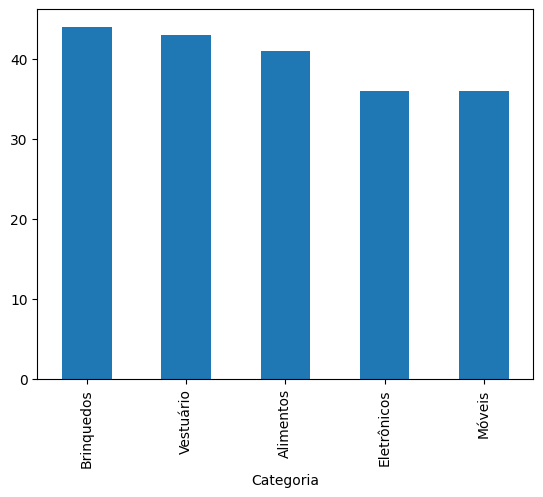

In [106]:
#grafico simples de barras
df['Categoria'].value_counts().plot(kind='bar')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

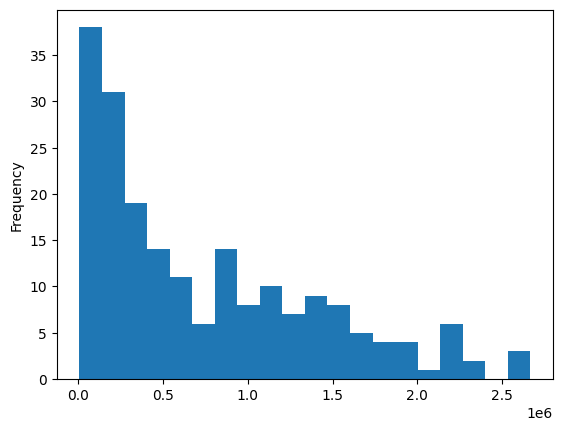

In [107]:
#histograma de distribuição de venda "toval venda"
df['Total da Venda'].plot(kind='hist', bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

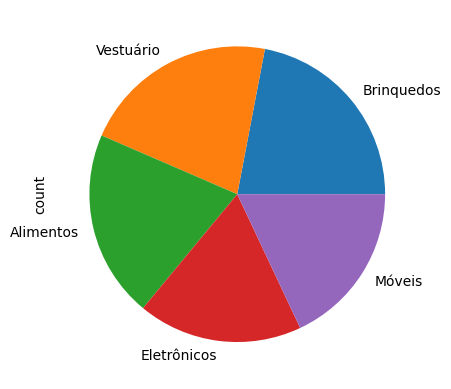

In [43]:
#grafico de barras pizza
df['Categoria'].value_counts().plot(kind='pie')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

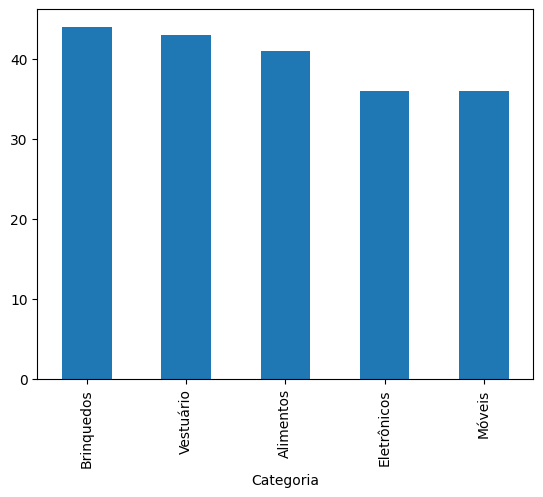

In [108]:
#grafico de barras pizza
df['Categoria'].value_counts().plot(kind='bar')
plt.show

CRIA UMA NOVA COLUNA STATUS DE CLIENTE

In [109]:
# criando a coluna de status de cliente
df['Status'] = np.where(df['Total da Venda'] > 10000, 'vip', 'Não Vip')

In [110]:
# vendo o head para ver se a coluna foi incluida
print(df.head())

  Data da Venda  ID do Cliente           Nome do Cliente Estado    Categoria  \
0    2025-02-14           5627           Brenda Monteiro     RS  Eletrônicos   
1    2025-04-19           1368             Nathan Mendes     PR    Alimentos   
2    2025-05-11           3170       Dra. Mariana da Paz     BA    Alimentos   
3    2025-01-13           7689           Pedro das Neves     PR   Brinquedos   
4    2025-01-23           1722  Dr. João Miguel Oliveira     SP   Brinquedos   

             Produto  Quantidade  Preço Unitário  Total da Venda  \
0             Tablet           3           39042          117126   
1               Café           2          179352          358704   
2              Leite           9          161073         1449657   
3  Jogo de Tabuleiro           8          239107         1912856   
4               Bola           8           23534          188272   

  Status_Cliente  Ano   Mês  Dia  Dia da semana Ano_mês     lucro     Gasto  \
0        Não VIP  2025    2   1

TRABALHANDO COM DATAS


In [111]:
# garantir que as informações de datas estão no fomato de datetime
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'])

In [112]:
# extrair as informações de datas
df['Ano'] = df['Data da Venda'].dt.year
df['Mês'] = df['Data da Venda'].dt.month
df['Dia'] = df['Data da Venda'].dt.day
df['Dia da semana'] = df['Data da Venda'].dt.dayofweek

ANALISE DE OPORTUNIDADES


In [113]:
# QUAL O TOTAL DE VENDAS
print(df['Total da Venda'].sum())

149943698


In [114]:
# qual a media das vendas
print(df['Total da Venda'].mean())

749718.49


In [51]:
#qual categoria venda mais vendida
print(df.groupby('Categoria')['Total da Venda'].sum())


Categoria
Alimentos      32963142
Brinquedos     31977236
Eletrônicos    26718980
Móveis         23610385
Vestuário      34673955
Name: Total da Venda, dtype: int64


In [115]:
# maior venda individual
print(df['Total da Venda'].max())


2666259


ANALISES FINAIS



<function matplotlib.pyplot.show(close=None, block=None)>

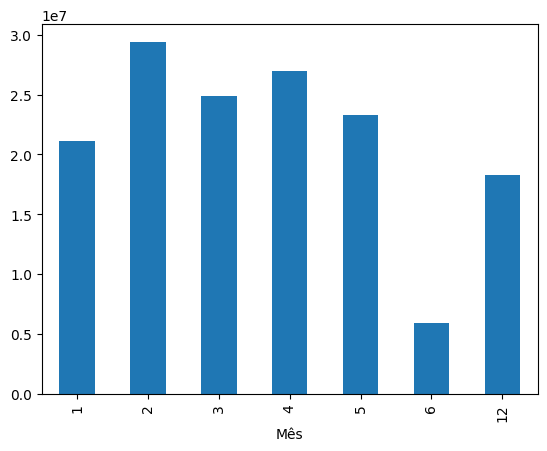

In [116]:
#grafico de vendas totais por mes
df.groupby('Mês')['Total da Venda'].sum().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

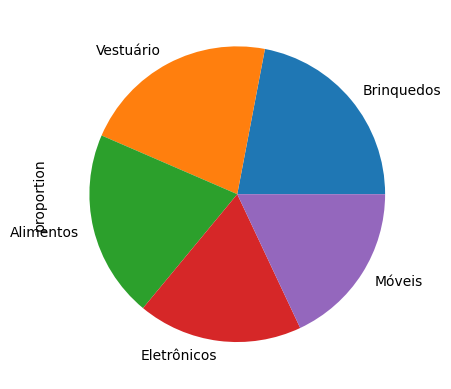

In [117]:
#grafico de pizza do percentual de vendas por categoria
df['Categoria'].value_counts(normalize=True).plot(kind='pie')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

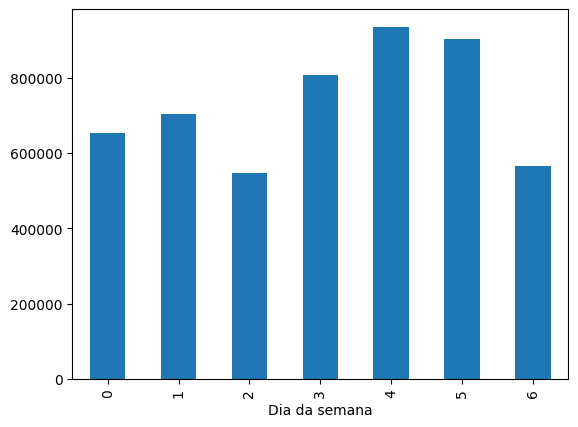

In [118]:
#grafico de vendas medias por dia da semana
df.groupby('Dia da semana')['Total da Venda'].mean().plot(kind='bar')
plt.show

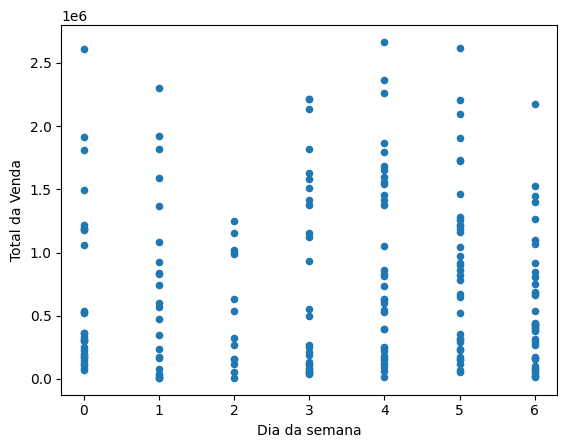

In [120]:
# grafico de dispersão de dias da semana com o total de vendas
df.plot(x='Dia da semana', y='Total da Venda', kind='scatter')
plt.show()

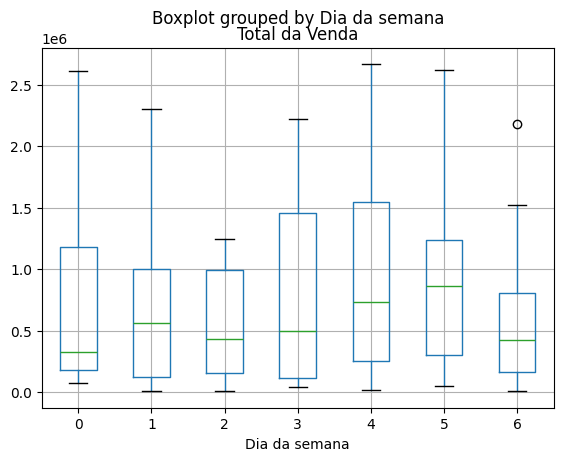

In [119]:
#boxplot da distribuição de vendas por dia
df.boxplot(column='Total da Venda', by='Dia da semana')
plt.show()

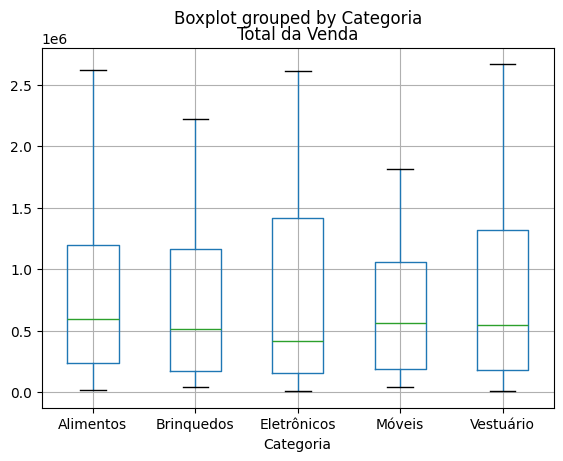

In [59]:
#boxplot por total de vendas por ctegoria
df.boxplot(column='Total da Venda', by='Categoria')
plt.show()

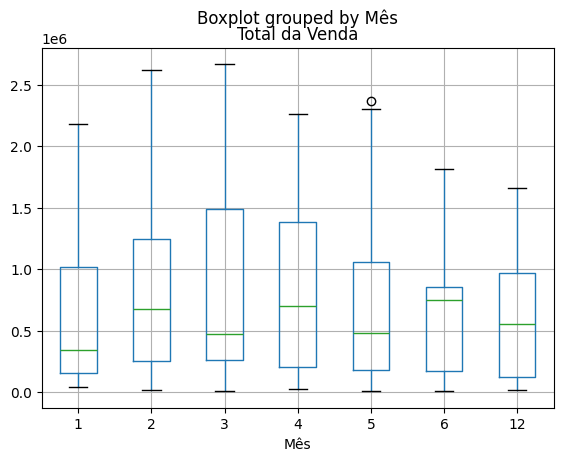

In [60]:
#boxplot por total de vendas por mes
df.boxplot(column='Total da Venda', by='Mês')
plt.show()

In [121]:
# comprarando o valor medio de vendas entre vip e não vip
print(df.groupby('Status')['Total da Venda'].mean())

Status
Não Vip      8217.333333
vip        761010.385787
Name: Total da Venda, dtype: float64


In [122]:
#comparando o valor total vendido por status
print(df.groupby('Status_Cliente')['Total da Venda'].sum())

Status_Cliente
Não VIP    101170939
VIP         48772759
Name: Total da Venda, dtype: int64


In [123]:
#comparando as compras dos vips e não vip por categoria
print(df.groupby(['Status_Cliente', 'Categoria'])['Total da Venda'].sum())

Status_Cliente  Categoria  
Não VIP         Alimentos      18466170
                Brinquedos     19798056
                Eletrônicos    19814997
                Móveis         21554662
                Vestuário      21537054
VIP             Alimentos      14496972
                Brinquedos     12179180
                Eletrônicos     6903983
                Móveis          2055723
                Vestuário      13136901
Name: Total da Venda, dtype: int64


CONCLUSÃO DA ESTRATEGIA


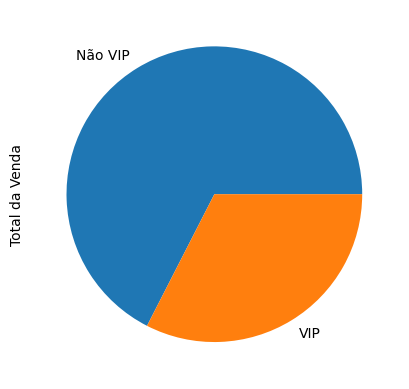

In [124]:
# gerar um grafico de pizza comparando o total de vendas de vips e não vips
df.groupby('Status_Cliente')['Total da Venda'].sum().plot(kind='pie')
plt.show()

<Axes: xlabel='Status_Cliente'>

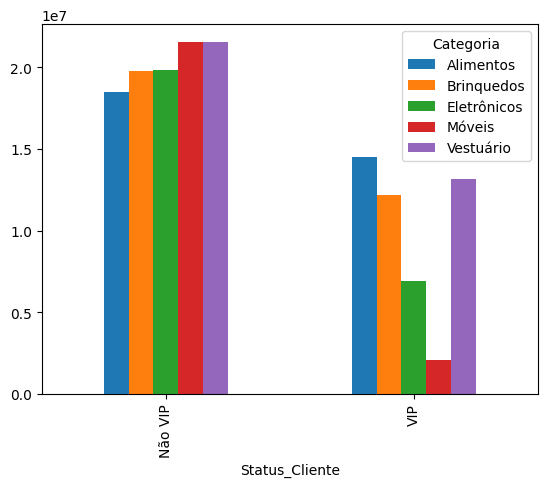

In [125]:
# gerar um grafico de barras comparandi as compras dos vips e nao vips por categoria
df.groupby(['Status_Cliente', 'Categoria'])['Total da Venda'].sum().unstack().plot(kind='bar')